In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import pprint
import pickle


In [80]:
df = pd.read_csv("./datasets/test.csv", index_col=0)
df.head

<bound method NDFrame.head of           id  Gender      Customer Type  Age   Type of Travel     Class  \
0      19556  Female     Loyal Customer   52  Business travel       Eco   
1      90035  Female     Loyal Customer   36  Business travel  Business   
2      12360    Male  disloyal Customer   20  Business travel       Eco   
3      77959    Male     Loyal Customer   44  Business travel  Business   
4      36875  Female     Loyal Customer   49  Business travel       Eco   
...      ...     ...                ...  ...              ...       ...   
25971  78463    Male  disloyal Customer   34  Business travel  Business   
25972  71167    Male     Loyal Customer   23  Business travel  Business   
25973  37675  Female     Loyal Customer   17  Personal Travel       Eco   
25974  90086    Male     Loyal Customer   14  Business travel  Business   
25975  34799  Female     Loyal Customer   42  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
0                  1

In [81]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


Формулировка задачи, целевая переменная и честный hold-out

In [82]:
df.shape

(25976, 24)

In [83]:
# no dublicates
df.drop_duplicates
df.shape

(25976, 24)

In [84]:
df = df.drop(['id'], axis='columns')


In [85]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [86]:
df.nunique()


Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3281
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            313
Arrival Delay in Minutes              320
satisfaction                            2
dtype: int64

In [87]:
non_num_cols = df.select_dtypes(exclude=['number']).columns
print(non_num_cols)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [88]:
for i in non_num_cols:
    print(f"unique values in { i }: {df[i].unique()}  |  {df[i].nunique()}")


unique values in Gender: ['Female' 'Male']  |  2
unique values in Customer Type: ['Loyal Customer' 'disloyal Customer']  |  2
unique values in Type of Travel: ['Business travel' 'Personal Travel']  |  2
unique values in Class: ['Eco' 'Business' 'Eco Plus']  |  3
unique values in satisfaction: ['satisfied' 'neutral or dissatisfied']  |  2


In [89]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Customer Type'] = df['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})
df['Class'] = df['Class'].map({'Eco': 0, 'Eco Plus': 1, 'Business': 2})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [90]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,0,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,0,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [91]:
for i in df.columns:
    print(f"dtype of {i} | {df[i].dtypes}")



dtype of Gender | int64
dtype of Customer Type | int64
dtype of Age | int64
dtype of Type of Travel | int64
dtype of Class | int64
dtype of Flight Distance | int64
dtype of Inflight wifi service | int64
dtype of Departure/Arrival time convenient | int64
dtype of Ease of Online booking | int64
dtype of Gate location | int64
dtype of Food and drink | int64
dtype of Online boarding | int64
dtype of Seat comfort | int64
dtype of Inflight entertainment | int64
dtype of On-board service | int64
dtype of Leg room service | int64
dtype of Baggage handling | int64
dtype of Checkin service | int64
dtype of Inflight service | int64
dtype of Cleanliness | int64
dtype of Departure Delay in Minutes | int64
dtype of Arrival Delay in Minutes | float64
dtype of satisfaction | int64


In [92]:
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [93]:
# no cat columns
df.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

In [94]:
# Arrival Delay in Minutes 83 (NaN)
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [95]:
df[df.isna().any(axis=1)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,1,1,21,1,0,632,1,5,1,4,...,2,4,2,5,4,5,2,9,NaN,0
656,0,1,9,1,0,762,2,5,2,2,...,4,2,5,2,5,2,4,51,NaN,0
1071,0,0,25,0,0,1017,3,4,4,5,...,5,2,5,2,3,2,5,126,NaN,0
1224,0,1,7,1,0,399,4,5,4,4,...,4,4,3,1,1,4,4,0,NaN,0
1589,1,1,58,0,0,129,5,3,3,3,...,5,5,5,5,3,5,5,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,0,1,45,0,0,352,5,1,1,1,...,5,1,1,1,3,2,5,26,NaN,1
24133,1,1,29,0,2,3873,3,3,3,3,...,3,3,4,4,4,3,3,19,NaN,0
24301,0,0,38,0,2,759,3,3,3,1,...,4,3,3,5,5,4,4,0,NaN,1
25128,1,1,52,0,2,3659,5,5,5,5,...,5,5,5,5,3,5,3,0,NaN,1


In [96]:
df = df.dropna()

In [97]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [98]:
df.shape

(25893, 23)

Checking for Correlation 

In [99]:
corr = df.corr(numeric_only=True)
print(corr)

                                     Gender  Customer Type       Age  \
Gender                             1.000000      -0.027804 -0.009222   
Customer Type                     -0.027804       1.000000  0.294139   
Age                               -0.009222       0.294139  1.000000   
Type of Travel                    -0.018892       0.307960 -0.030018   
Class                              0.003454       0.105489  0.140741   
Flight Distance                    0.005131       0.229226  0.099918   
Inflight wifi service              0.005954      -0.001359  0.009116   
Departure/Arrival time convenient -0.008485       0.206527  0.031898   
Ease of Online booking            -0.002021       0.012484  0.013728   
Gate location                      0.005138       0.001890  0.002677   
Food and drink                     0.014657       0.047509  0.024613   
Online boarding                    0.055609       0.188781  0.202648   
Seat comfort                       0.047656       0.143126  0.15

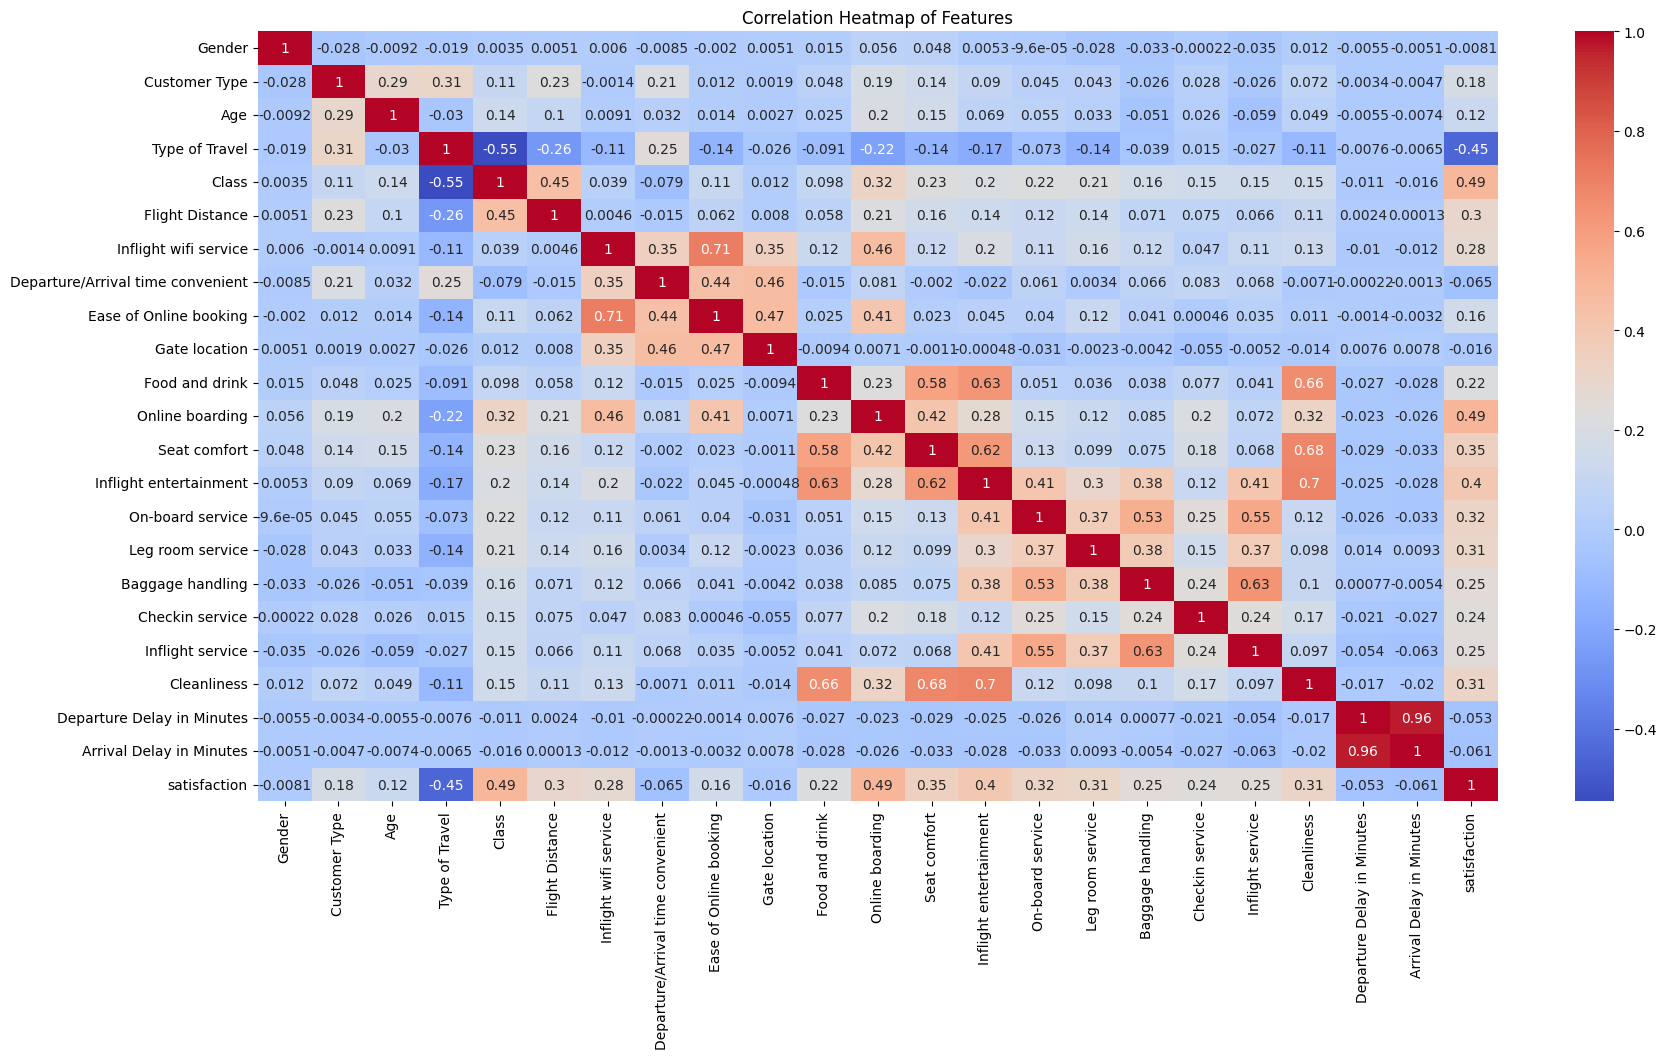

In [100]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

In [101]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

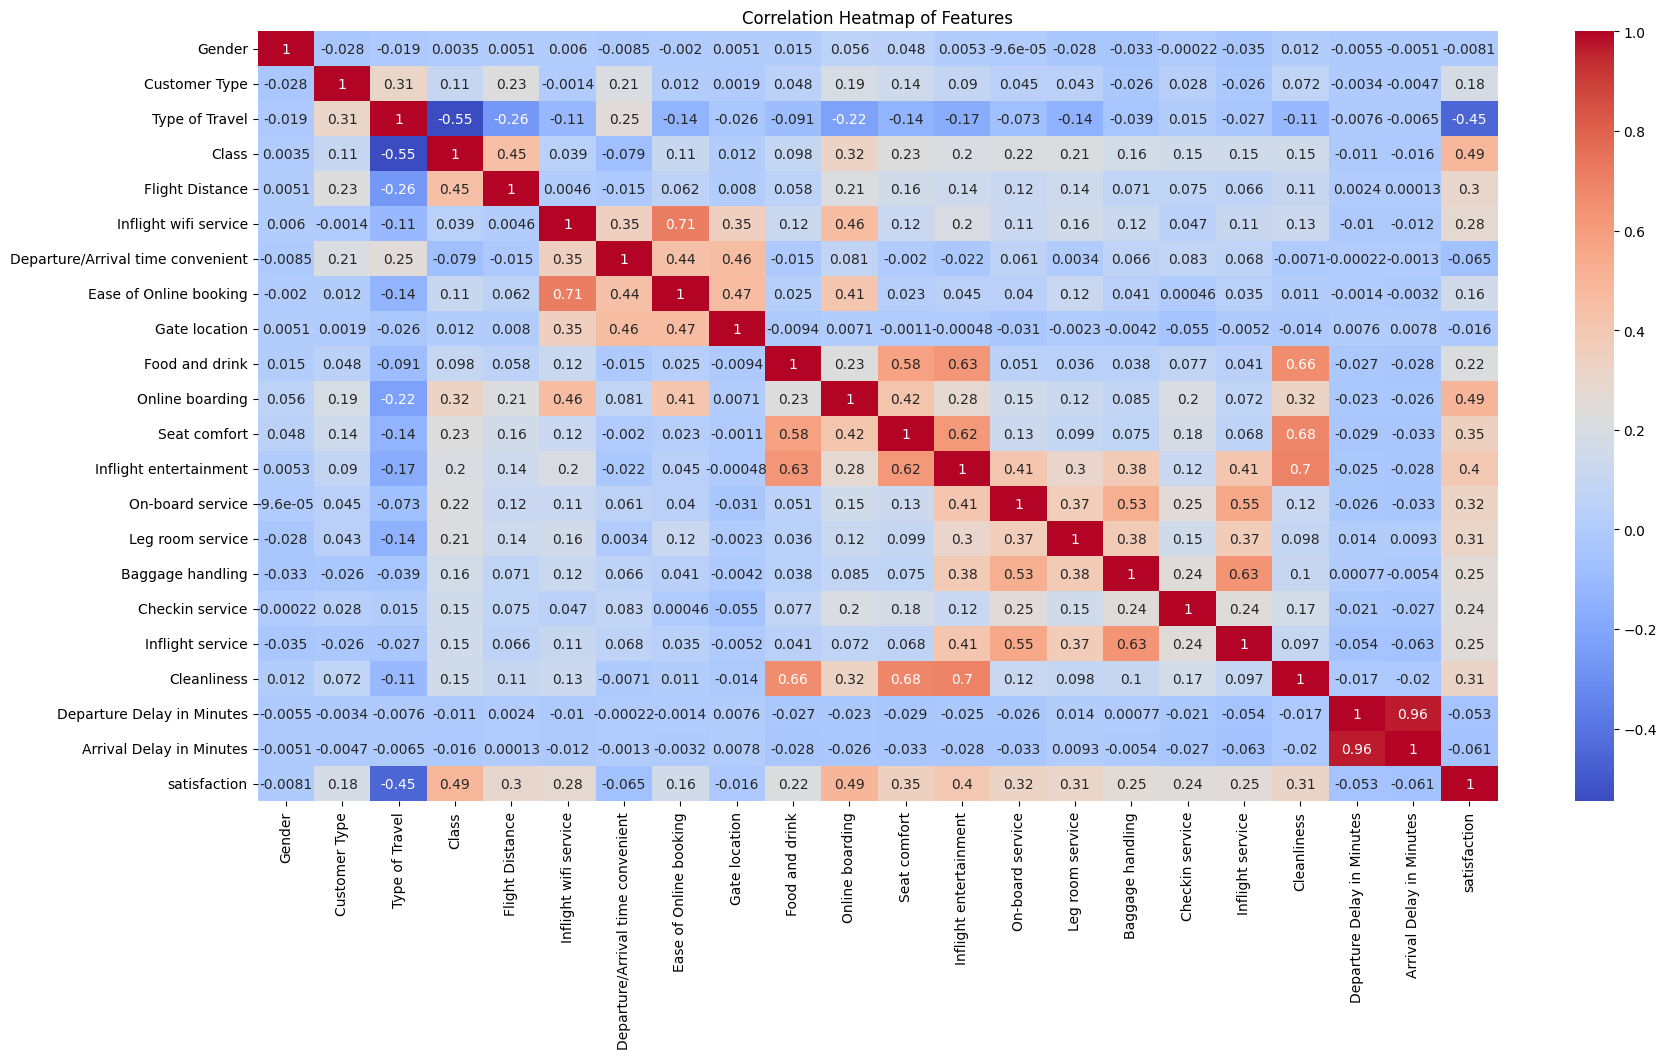

In [102]:
df = df.drop(columns=['Age'])

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

In [103]:
len(df.columns)

22

In [104]:
X = df.drop(columns='satisfaction')
y = df['satisfaction']

In [105]:
X.shape, y.shape

((25893, 21), (25893,))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [107]:
df.columns


Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Data Audit

In [108]:
df.info(), df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int64  
 1   Customer Type                      25893 non-null  int64  
 2   Type of Travel                     25893 non-null  int64  
 3   Class                              25893 non-null  int64  
 4   Flight Distance                    25893 non-null  int64  
 5   Inflight wifi service              25893 non-null  int64  
 6   Departure/Arrival time convenient  25893 non-null  int64  
 7   Ease of Online booking             25893 non-null  int64  
 8   Gate location                      25893 non-null  int64  
 9   Food and drink                     25893 non-null  int64  
 10  Online boarding                    25893 non-null  int64  
 11  Seat comfort                       25893 non-null  int64  


(None,
 Gender                               0
 Customer Type                        0
 Type of Travel                       0
 Class                                0
 Flight Distance                      0
 Inflight wifi service                0
 Departure/Arrival time convenient    0
 Ease of Online booking               0
 Gate location                        0
 Food and drink                       0
 Online boarding                      0
 Seat comfort                         0
 Inflight entertainment               0
 On-board service                     0
 Leg room service                     0
 Baggage handling                     0
 Checkin service                      0
 Inflight service                     0
 Cleanliness                          0
 Departure Delay in Minutes           0
 Arrival Delay in Minutes             0
 satisfaction                         0
 dtype: int64)

In [109]:
df['satisfaction'].value_counts(normalize=True)

satisfaction
0    0.561078
1    0.438922
Name: proportion, dtype: float64

Standardize the data

In [110]:
df.describe().T[['min', 'max', 'mean', 'std']]

,min,max,mean,std
Gender,0.0,1.0,0.506971,0.499961
Customer Type,0.0,1.0,0.815317,0.388048
Type of Travel,0.0,1.0,0.305604,0.460672
Class,0.0,2.0,1.036033,0.961715
Flight Distance,31.0,4983.0,1193.753254,998.626779
Inflight wifi service,0.0,5.0,2.723709,1.334711
Departure/Arrival time convenient,0.0,5.0,3.046422,1.532971
Ease of Online booking,0.0,5.0,2.755996,1.412552
Gate location,1.0,5.0,2.976442,1.281661
Food and drink,0.0,5.0,3.214923,1.331895


In [111]:
def standartize_data(X_train, X_test):

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)


    X_train = (X_train - mean) / std
    X_test  = (X_test - mean) / std

    return X_train, X_test



X_train, X_test = standartize_data(X_train, X_test)



In [112]:
X_train.describe().T[['min', 'max', 'mean', 'std']]

,min,max,mean,std
Gender,-1.003925,0.996090,1.317199e-16,1.000028
Customer Type,-2.098186,0.476602,9.565375e-17,1.000028
Type of Travel,-0.664171,1.505637,1.364242e-16,1.000028
Class,-1.072508,1.006551,5.017902e-17,1.000028
Flight Distance,-1.162728,3.791315,-6.037163e-17,1.000028
Inflight wifi service,-2.040789,1.708456,-2.665760e-17,1.000028
Departure/Arrival time convenient,-1.987954,1.276493,1.999320e-17,1.000028
Ease of Online booking,-1.950901,1.590136,1.364242e-16,1.000028
Gate location,-1.548179,1.587800,-2.116927e-17,1.000028
Food and drink,-2.415174,1.342210,1.050623e-16,1.000028


In [113]:
class MyLogisticRegression:
    def __init__(self, lr = 0.01, n_iter = 1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)

        self.bias = 0

        for _ in range(self.n_iter):

            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias-= self.lr * db


    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    

    def predict(self, X, threshold=0.5):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= threshold).astype(int)
    

    

In [114]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [115]:
model = MyLogisticRegression(lr=0.1, n_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"W: {model.weights}" )
print(f"b: {model.bias}")




Accuracy: 0.8676622039134912
W: [-0.09230818  0.72814153 -1.25912136  0.3104191  -0.00311696  0.55449197
 -0.26107182 -0.23469257  0.01185894 -0.02281833  0.81054425  0.03160291
  0.14270226  0.37073187  0.30821356  0.17777302  0.45657612  0.12606415
  0.26386369 -0.04250723 -0.17660103]
b: -0.4870021738036332


In [116]:
y_proba = model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8676622039134912
Precision: 0.8630382775119617
Recall: 0.8350694444444444
F1-score: 0.8488235294117648
ROC AUC: 0.9233988615964063


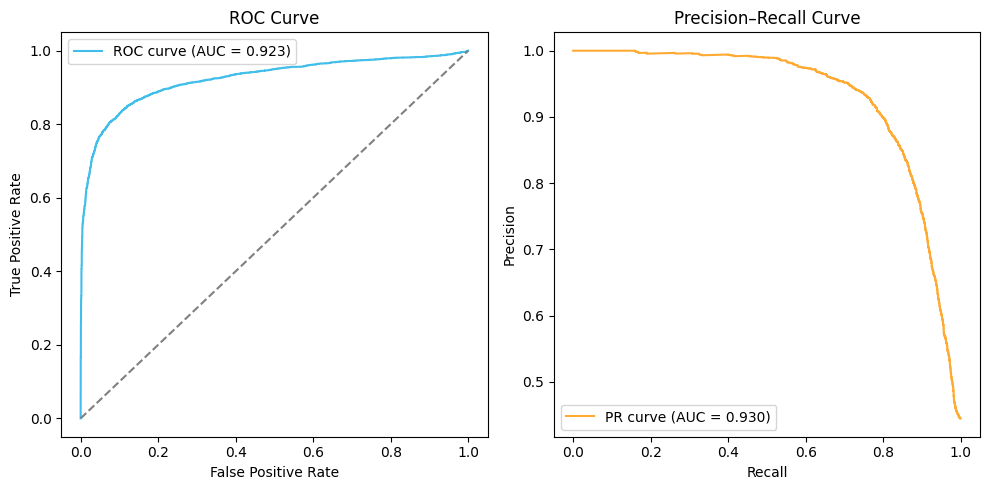

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# 1️⃣ Get probabilities for the positive class
y_proba = model.predict_proba(X_test)

# If your function returns 2D (for class 0 and 1)
# then take the second column:
if y_proba.ndim > 1:
    y_proba = y_proba[:, 1]

# 2️⃣ ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# 3️⃣ Precision–Recall data
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# 4️⃣ Plot
plt.figure(figsize=(10,5))

# ROC curve
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})", color="#41BEE9")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Precision–Recall curve
plt.subplot(1,2,2)
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.3f})", color="#FFAA33")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()


In [118]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000, solver="lbfgs", n_jobs=-1)
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X, y, cv=cv, scoring="roc_auc")
print("CV ROC AUC:", scores, scores.mean())


CV ROC AUC: [0.92486789 0.92393349 0.92842017 0.92379918 0.92489291] 0.9251827257623587


In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_distributions = {
    "logisticregression__C": loguniform(1e-3, 1e3),  # сила регуляризации (меньше C → сильнее L2)
    # если есть дисбаланс классов — включите веса:
    "logisticregression__class_weight": [None, "balanced"],
    # для L1 можно добавить:
    # "logisticregression__penalty": ["l1", "l2"],
    # "logisticregression__solver": ["liblinear", "saga"],
}

rs = RandomizedSearchCV(
    pipe, param_distributions=param_distributions, n_iter=20,
    scoring="roc_auc", cv=cv, n_jobs=-1, random_state=42, verbose=1
)
rs.fit(X, y)
print("Best params:", rs.best_params_)
print("Best CV ROC AUC:", rs.best_score_)

best_pipe = rs.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'logisticregression__C': np.float64(0.4731474644815003), 'logisticregression__class_weight': None}
Best CV ROC AUC: 0.9251844519206361


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
best_pipe.fit(X_tr, y_tr)

y_pred  = best_pipe.predict(X_te)
y_proba = best_pipe.predict_proba(X_te)[:, 1]

print("ACC:", accuracy_score(y_te, y_pred))
print("F1:",  f1_score(y_te, y_pred))
print("ROC AUC:", roc_auc_score(y_te, y_proba))


ACC: 0.8743000579262405
F1: 0.8550434201736807
ROC AUC: 0.928371417178046


In [121]:
from sklearn.metrics import precision_recall_curve
prec, rec, thr = precision_recall_curve(y_te, y_proba)
f1 = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
t_opt = thr[f1.argmax()]
y_opt = (y_proba >= t_opt).astype(int)
